<a href="https://colab.research.google.com/github/rahulevol/Projects/blob/main/InternshipDay1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv('/content/Titanic-Dataset.csv')


In [6]:
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [7]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [8]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [9]:
df = df.drop(columns=['Cabin'])

In [10]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [11]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

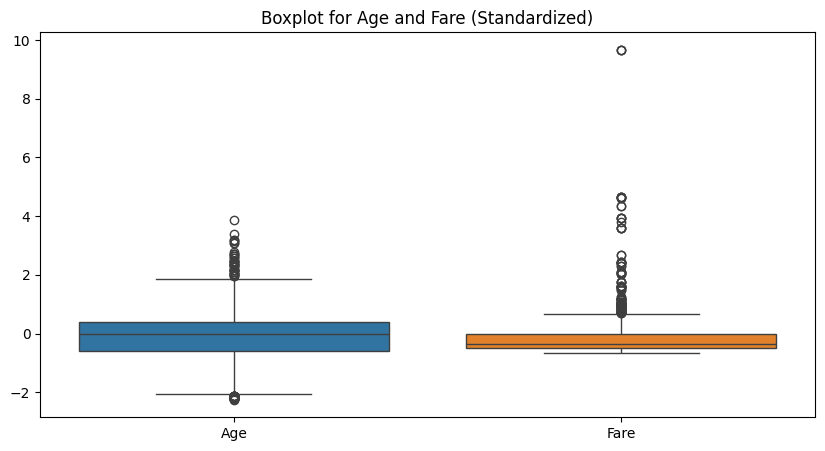

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplot for Age and Fare (Standardized)")
plt.show()

In [13]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

In [14]:
df = remove_outliers(df, 'Age')
df = remove_outliers(df, 'Fare')

In [15]:
print("Cleaned dataset shape:", df.shape)
print(df.head())

Cleaned dataset shape: (718, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name       Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris -0.592481      1      0   
2                        Heikkinen, Miss. Laina -0.284663      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.407926      1      0   
4                      Allen, Mr. William Henry  0.407926      0      0   
5                              Moran, Mr. James  0.000000      0      0   

             Ticket      Fare  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171 -0.502445      True       False        True  
2  STON/O2. 3101282 -0.488854     False       False        True  
3            113803  0.420730     False       False        True  
4            373450 -0.486337      